# Common Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
# text preprocessing
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re

In [13]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /opt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /opt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load and preprocess data

In [14]:
df_train = pd.read_csv('./Data/train.csv')
df_test = pd.read_csv('./Data/test.csv')

X_train = df_train.reviews
# X_test = df_test.reviews

y_train = df_train.ratings
# y_test = df_test.ratings

data = pd.concat([df_train, df_test])

/opt/anaconda/envs/env_pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


In [15]:
df_train.head()

,Unnamed: 0,reviews,ratings
0,0,"This book was very informative, covering all a...",4
1,1,I am already a baseball fan and knew a bit abo...,5
2,2,I didn't like this product it smudged all unde...,1
3,3,I simply love the product. I appreciate print ...,5
4,4,It goes on very easily and makes my eyes look ...,5


In [16]:
reviews = data.reviews

In [17]:
def preprocess_and_tokenize(data):    

    #remove html markup
    data = re.sub("(<.*?>)", "", data)

    #remove urls
    data = re.sub(r'http\S+', '', data)
    
    #remove hashtags and @names
    data= re.sub(r"(#[\d\w\.]+)", '', data)
    data= re.sub(r"(@[\d\w\.]+)", '', data)

    #remove punctuation and non-ascii digits
    data = re.sub("(\\W|\\d)", " ", data)
    
    #remove whitespace
    data = data.strip()
    
    # tokenization with nltk
    data = word_tokenize(data)
    
    # stemming with nltk
    porter = PorterStemmer()
    stem_data = [porter.stem(word) for word in data]
        
    return data

# Make a dictionary from the corpus

In [18]:
def get_dictionary(reviews):
    all_tokens = []
    for review in reviews:
      review = preprocess_and_tokenize(review)
      all_tokens+=review
    all_tokens += ['-OOV-']
    all_tokens = list(set(all_tokens))
    all_tokens = dict(zip(all_tokens,list(range(1,len(all_tokens)+1))))
    return all_tokens

In [19]:
corpus_dict = get_dictionary(reviews)

In [20]:
corpus_dict.keys()

dict_keys(['compatibility', 'crumble', 'jewl', 'hobby', 'If', 'variety', 'tweezerman', 'shines', 'SMELLS', 'Absolutley', 'believe', 'Sanitary', 'Hertz', 'Timothy', 'LINDA', 'stunningly', 'LIO', 'husb', 'Heater', 'chemically', 'dk', 'plugged', 'myvface', 'spritz', 'missing', 'buckk', 'YOURSELF', 'petals', 'avoided', 'shop', 'Fulton', 'docter', 'OFFER', 'coaxed', 'collapsing', 'Cyclops', 'stage', 'serviceable', 'everrrrrrrrrrrr', 'Dreads', 'unbearable', 'Things', 'laying', 'Hairs', 'unfamiliar', 'pendant', 'Planet', 'XL', 'CHANGED', 'sigma', 'productss', 'where', 'musk', 'lippie', 'conair', 'shinier', 'gaurd', 'Unusual', 'criticism', 'cats', 'Off', 'KEEP', 'incense', 'SPECIAL', 'professional', 'ward', 'frat', 'bunions', 'Boto', 'stairs', 'Hollywood', 'Cohosh', 'fter', 'te', 'tootache', 'anymore', 'breakable', 'tbh', 'Mask', 'ebook', 'worths', 'dj', 'instruction', 'Warranty', 'respects', 'St', 'Silver', 'convience', 'carrys', 'fallen', 'MarcJacobs', 'maniac', 'blackhead', 'inside', 'closi

# Static Word Embeddings
Build a global vocabulary using unique words in the documents by ignoring the meaning of words in different context

**One-Hot**

In [21]:
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# words to be encoded
values = list(corpus_dict.keys())
print(values)

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded_vectors = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded_vectors)


['compatibility', 'crumble', 'jewl', 'hobby', 'If', 'variety', 'tweezerman', 'shines', 'SMELLS', 'Absolutley', 'believe', 'Sanitary', 'Hertz', 'Timothy', 'LINDA', 'stunningly', 'LIO', 'husb', 'Heater', 'chemically', 'dk', 'plugged', 'myvface', 'spritz', 'missing', 'buckk', 'YOURSELF', 'petals', 'avoided', 'shop', 'Fulton', 'docter', 'OFFER', 'coaxed', 'collapsing', 'Cyclops', 'stage', 'serviceable', 'everrrrrrrrrrrr', 'Dreads', 'unbearable', 'Things', 'laying', 'Hairs', 'unfamiliar', 'pendant', 'Planet', 'XL', 'CHANGED', 'sigma', 'productss', 'where', 'musk', 'lippie', 'conair', 'shinier', 'gaurd', 'Unusual', 'criticism', 'cats', 'Off', 'KEEP', 'incense', 'SPECIAL', 'professional', 'ward', 'frat', 'bunions', 'Boto', 'stairs', 'Hollywood', 'Cohosh', 'fter', 'te', 'tootache', 'anymore', 'breakable', 'tbh', 'Mask', 'ebook', 'worths', 'dj', 'instruction', 'Warranty', 'respects', 'St', 'Silver', 'convience', 'carrys', 'fallen', 'MarcJacobs', 'maniac', 'blackhead', 'inside', 'closing', 'thic

In [22]:
onehot_encoded_vectors.shape

(23304, 23304)

**TF-IDF**

Term frequency-inverse document frequency (TF-IDF) is a feature vectorization method widely used in text mining to reflect the importance of a term to a document in the corpus. Denote a term by $t$, a document by $d$, and the corpus by $D$. Term frequency $T F(t, d)$ is the number of times that term $t$ appears in document $d$, while document frequency $D F(t, D)$ is the number of documents that contains term $t$. If we only use term frequency to measure the importance, it is very easy to overemphasize terms that appear very often but carry little information about the document, e.g., "a", "the", and "of". If a term appears very often across the corpus, it means it doesn't carry special information about a particular document. Inverse document frequency helps score the rarity of words and is a numerical measure of how much information a term provides

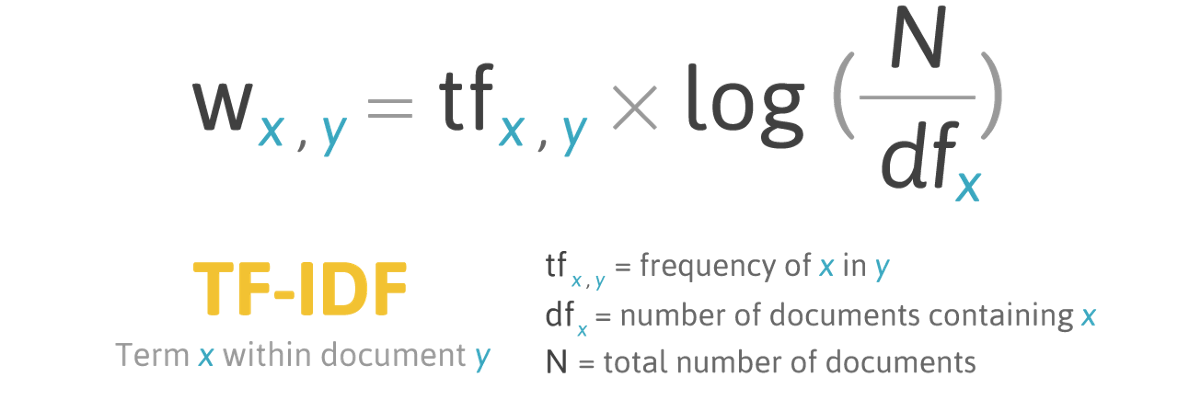

We use the sklearn [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) which
transforms text into a sparse matrix of n-gram counts followed by the TF-IDF transformation from the matrix of counts.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vect = TfidfVectorizer(tokenizer=preprocess_and_tokenize, sublinear_tf=True, norm='l2', ngram_range=(1, 1))

# fit on our complete corpus
vect.fit_transform(reviews)

# transform datasets to vectors
tfidf_vectors = vect.transform(reviews)
tfidf_tokens = vect.get_feature_names()

In [ ]:
df_tfidfvect = pd.DataFrame(data = tfidf_vectors.toarray(), columns= tfidf_tokens)

In [ ]:
df_tfidfvect['about']

**Word2Vec**

Download pretrained word2vec vectors or wget is as follows 

In [32]:
from gensim import models

In [ ]:
# !wget "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2022-03-28 12:41:34--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.199.112
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.199.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G   100MB/s    in 19s     

2022-03-28 12:41:53 (82.5 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



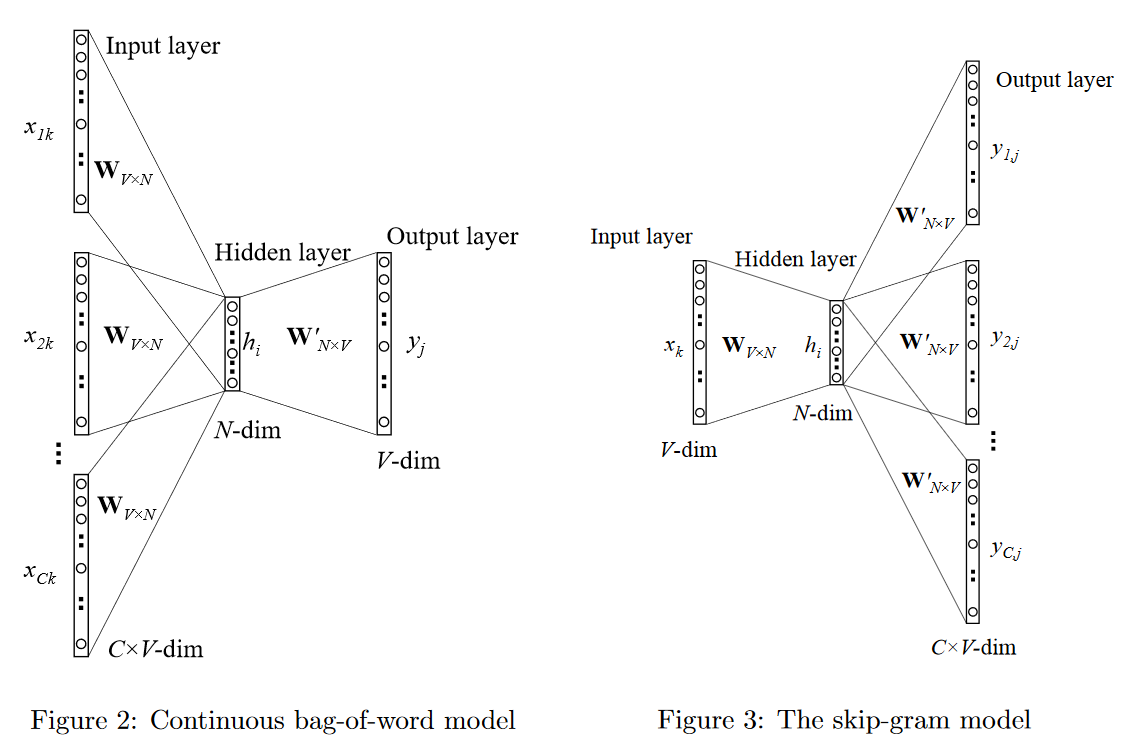

Load the word2vec vectors

In [34]:
word2vec_model = models.KeyedVectors.load_word2vec_format('../GoogleNews-vectors-negative300.bin', binary=True)
def getVectorFromW2V(str):
 if str in word2vec_model:
  return word2vec_model[str]
 else:
  return None

In [45]:
# stop_words

In [46]:
# getVectorFromW2V('too')

Map your vocabulary to the word2vec representations

In [47]:
def get_w2v_embeddings(corpus_dict):
  w2v_embeddings = np.zeros((len(corpus_dict) + 1, 300))
  for word,i in corpus_dict.items():
    w2v_vector = getVectorFromW2V(word)
  if w2v_vector is not None:
    w2v_embeddings[i] = w2v_vector
  return w2v_embeddings

**Glove**

 GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

Download one of the 4 variants of the pre-trained Glove vectors from https://nlp.stanford.edu/projects/glove/
OR
For convenience in Google Colab, wget it as follows

In [50]:
import zipfile

In [51]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
zip_ref = zipfile.ZipFile("./glove.6B.zip", 'r')
zip_ref.extractall("./")
zip_ref.close()

--2022-10-03 00:21:27--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-10-03 00:21:28--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-10-03 00:21:29--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

Load the Glove vectors

In [52]:
f = open('glove.6B.300d.txt') 
embedd_index = {}
for line in f:
  val = line.split()
  word = val[0]
  coff = np.asarray(val[1:],dtype = 'float')
  embedd_index[word] = coff
f.close()

In [55]:
# embedd_index.keys()

Map your vocabulary to the Glove representations

In [53]:
def get_glove_embeddings(corpus_dict):
  glove_embeddings = np.zeros((len(corpus_dict) + 1, 300))
  for word,i in corpus_dict.items():
    glove_emb = embedd_index.get(word)
    if glove_emb is not None:
        glove_embeddings[i] = glove_emb
  return glove_embeddings

# Contextual Embeddings
Learn sequence-level semantics by considering the sequence of all words in the documents

**BERT**

In [11]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='bert.png'></td><td><img src='bertlayer.png'></td></tr></table>"))

,


In [5]:
# !pip install transformers

In [7]:
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics import classification_report
from tqdm import tqdm
import numpy as np
import pandas as pd
import pickle

Initialize the model and tokenizer. We have used the bert-base-uncased for demo. Lighter variations like [distilbert-base-uncased](https://huggingface.co/distilbert-base-uncased), representations from transformers like [BART](https://huggingface.co/docs/transformers/model_doc/bart) and several other transformers also work very similarly

In [8]:
MODEL_NAME = 'bert-base-uncased'

In [9]:
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
print("bert model is now available")
model = BertModel.from_pretrained(MODEL_NAME)
model = model.to(torch.device('cpu'))
model.eval()

bert model is now available


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

Extract sentence level representations

In [12]:
# Input:Text Sentence, Output:BERT Representation of the sentence
def get_bert_embeddings(text):

    '''
    1.  Use the BERT tokenizer to first split the word into tokens
    2.  Add the special tokens needed for sentence classifications (these are [CLS] at the first position, and [SEP] at the end of the sentence).
    3.  Replace each token with its id from the embedding table which is a component we get with the trained model.
    '''
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs,output_hidden_states=True)
    hidden_states = outputs.hidden_states
    token_vecs = torch.cat((hidden_states[-4], torch.cat((hidden_states[-3], torch.cat(
        (hidden_states[-2], hidden_states[-1]), dim=0)), dim=0)), dim=0)
    vectors = torch.mean(torch.mean(token_vecs, dim=0), dim=0)
    return vectors

# References and Useful links



*   [TF-IDF](https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a)
*   [Intro To BERT](http://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/)


*   [Static Vs Contextual Embeddings](https://stackoverflow.com/questions/62272056/what-are-the-differences-between-contextual-embedding-and-word-embedding)




